In [1]:
import pandas as pd
import numpy as np
import nltk


from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

import tensorflow as tf
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

from keras.models import Sequential
from keras import layers
import pandas as pd 
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

# gensim
import gensim
from imblearn.over_sampling import ADASYN 
# keras
np.random.seed(13)

from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb, reuters
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb, reuters
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop


# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [69]:
courses = pd.read_csv('Coursera_courses.csv')
reviews = pd.read_csv('Coursera_reviews.csv')

In [70]:
# merge two datasets the reviews & courses  on the column 'course_id' get one dataframe 
df = pd.merge(reviews, courses, on='course_id') 
df 

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
...,...,...,...,...,...,...,...,...
1454706,Great teacher!,By George B S,"Jul 16, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454707,Very satisfied,By Abubakarr K,"Jun 13, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454708,awesome course,By MD. I H,"May 28, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...
1454709,Comprehensive!,By James K,"May 28, 2018",5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...


In [71]:
df.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454711 entries, 0 to 1454710
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
 5   name          1454711 non-null  object
 6   institution   1454711 non-null  object
 7   course_url    1454711 non-null  object
dtypes: int64(1), object(7)
memory usage: 99.9+ MB


In [73]:
df.describe()

,rating
count,1.454711e+06
mean,4.696649e+00
std,6.983271e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [74]:
#number of rows- reviews- 
df.shape

(1454711, 8)

In [75]:
# create new columns of month & year to replace the date_reviews column. 
df['year'] = pd.to_datetime(df['date_reviews']).dt.year
df['day'] = pd.to_datetime(df['date_reviews']).dt.day
df['month'] = pd.to_datetime(df['date_reviews']).dt.month

df = df.drop('date_reviews', 1)

In [76]:
df

,reviews,reviewers,rating,course_id,name,institution,course_url,year,day,month
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,2020,12,2
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,2020,28,9
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,2020,8,4
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,2020,24,2
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,2020,18,6
...,...,...,...,...,...,...,...,...,...,...
1454706,Great teacher!,By George B S,5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,2018,16,7
1454707,Very satisfied,By Abubakarr K,5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,2018,13,6
1454708,awesome course,By MD. I H,5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,2018,28,5
1454709,Comprehensive!,By James K,5,technical-support-fundamentals,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,2018,28,5


In [10]:
#drop course URL column 
df = df.drop('course_url', 1)
df

,reviews,reviewers,rating,course_id,name,institution,year,day,month
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,12,2
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,28,9
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,8,4
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,24,2
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,18,6
...,...,...,...,...,...,...,...,...,...
1454706,Great teacher!,By George B S,5,technical-support-fundamentals,Technical Support Fundamentals,Google,2018,16,7
1454707,Very satisfied,By Abubakarr K,5,technical-support-fundamentals,Technical Support Fundamentals,Google,2018,13,6
1454708,awesome course,By MD. I H,5,technical-support-fundamentals,Technical Support Fundamentals,Google,2018,28,5
1454709,Comprehensive!,By James K,5,technical-support-fundamentals,Technical Support Fundamentals,Google,2018,28,5


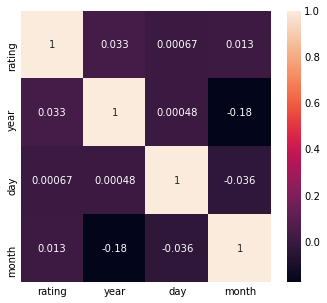

In [11]:
# Finding the correlation between the feature column

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
#find out the total number of missing values in each column 
df.isnull().sum()

reviews        140
reviewers        0
rating           0
course_id        0
name             0
institution      0
year             0
day              0
month            0
dtype: int64

In [13]:
# there is null values in reviews column I will check the rating if it was high 
#then I will fill the null value with 'good high rate; otherwise it will be filled with bad low rate

mask= df[df.reviews.isnull()]



mask['reviews']=np.where(mask['rating'] >= 3, 'good high rate', 'bad low rate')
df['reviews'].fillna(mask['reviews'], inplace=True)
df.head(1000)

2021-10-21 07:18:32,527 : INFO : NumExpr defaulting to 4 threads.


,reviews,reviewers,rating,course_id,name,institution,year,day,month
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,12,2
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,28,9
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,8,4
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,24,2
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,18,6
...,...,...,...,...,...,...,...,...,...
995,\n\nExcellent course to learn the basics of fi...,By Gabriela G,4,financial-markets-global,Financial Markets,Yale University,2020,22,6
996,I am very happy with the course and everything...,By Freda,4,financial-markets-global,Financial Markets,Yale University,2020,19,8
997,I’ve paid for the course certificate and I did...,By Mariana A G S P,4,financial-markets-global,Financial Markets,Yale University,2020,1,7
998,Enjoyed it wonderfully explained by professor ...,By Aseem J,4,financial-markets-global,Financial Markets,Yale University,2020,4,5


In [14]:
#examining the datafram after dealing with null values
df.isnull().sum()

reviews        0
reviewers      0
rating         0
course_id      0
name           0
institution    0
year           0
day            0
month          0
dtype: int64

In [15]:
#checking for correct modification 
df.loc[df['reviews']=='good high rate']

,reviews,reviewers,rating,course_id,name,institution,year,day,month
76301,good high rate,By Christopher L J,5,computer-networking,The Bits and Bytes of Computer Networking,Google,2020,26,9
76310,good high rate,By Jerold K G,5,computer-networking,The Bits and Bytes of Computer Networking,Google,2020,10,6
76783,good high rate,By Christopher L J,5,computer-networking,The Bits and Bytes of Computer Networking,Google,2020,26,9
76792,good high rate,By Jerold K G,5,computer-networking,The Bits and Bytes of Computer Networking,Google,2020,10,6
76805,good high rate,By Christopher L J,5,computer-networking,The Bits and Bytes of Computer Networking,Google,2020,26,9
...,...,...,...,...,...,...,...,...,...
1253149,good high rate,By Dr. S G,5,renewable-energy-entrepreneurship,Renewable Energy and Green Building Entreprene...,Duke University,2020,22,6
1253159,good high rate,By Dr. S G,5,renewable-energy-entrepreneurship,Renewable Energy and Green Building Entreprene...,Duke University,2020,22,6
1425388,good high rate,By Ritu K,4,technical-support-fundamentals,Technical Support Fundamentals,Google,2020,4,8
1425399,good high rate,By Ritu K,4,technical-support-fundamentals,Technical Support Fundamentals,Google,2020,4,8


In [16]:
#checking for correct modification 
len(df.loc[df['reviews']=='bad low rate'])

7

In [17]:
df.rating.value_counts(normalize=True)

5    0.787898
4    0.155840
3    0.033205
1    0.011930
2    0.011128
Name: rating, dtype: float64

In [18]:
# Set ratings >3  to 1, the rest to 0
df['sentiment'] = np.where(df['rating'] >= 3, '1', '0')
df.head()

,reviews,reviewers,rating,course_id,name,institution,year,day,month,sentiment
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,12,2,1
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,28,9,1
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,8,4,1
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,24,2,1
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,18,6,1


In [19]:
df.duplicated().sum()

934764

In [20]:
#check for duplicated rows 

df.duplicated(subset=["course_id","reviewers","reviews","name"]).value_counts()

True     934783
False    519928
dtype: int64

In [21]:
df.drop_duplicates(subset=["course_id","reviewers","reviews","name"], keep='first', inplace=True)
df


,reviews,reviewers,rating,course_id,name,institution,year,day,month,sentiment
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,12,2,1
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,28,9,1
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,8,4,1
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,24,2,1
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,18,6,1
...,...,...,...,...,...,...,...,...,...,...
1454656,Great teacher!,By George B S,5,technical-support-fundamentals,Technical Support Fundamentals,Google,2018,16,7,1
1454657,Very satisfied,By Abubakarr K,5,technical-support-fundamentals,Technical Support Fundamentals,Google,2018,13,6,1
1454658,awesome course,By MD. I H,5,technical-support-fundamentals,Technical Support Fundamentals,Google,2018,28,5,1
1454659,Comprehensive!,By James K,5,technical-support-fundamentals,Technical Support Fundamentals,Google,2018,28,5,1


In [22]:
df.shape

(519928, 10)

In [23]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())



df['reviews'] = df.reviews.map(alphanumeric).map(punc_lower)
df.head()

,reviews,reviewers,rating,course_id,name,institution,year,day,month,sentiment
0,pretty dry but i was able to pass with just t...,By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,12,2,1
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,28,9,1
2,information was perfect the program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,8,4,1
3,a few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,24,2,1
4,excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,2020,18,6,1


Text(0, 0.5, 'Count of Reviews')

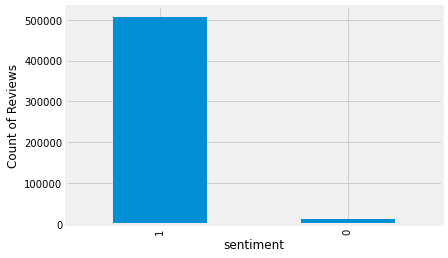

In [24]:
#discovering imbalance in dataset 
ax = df.sentiment.value_counts().plot(kind='bar')
plt.xlabel("sentiment")
plt.ylabel("Count of Reviews")
# the data is Highly imbalanced will be dealt with in the final submission

In [25]:
#discovering imbalance in dataset 
df['sentiment'].value_counts()

1    507233
0     12695
Name: sentiment, dtype: int64

In [26]:
# Which institution had the most courses?
inst_high_Courses = df.institution.value_counts()
inst_high_Courses

University of Michigan                                   57194
DeepLearning.AI                                          40329
Google                                                   26936
University of Pennsylvania                               25763
IBM                                                      24975
                                                         ...  
Peter the Great St. Petersburg Polytechnic University       33
Google - Spectrum Sharing                                   33
University of New Mexico                                     6
GitLab                                                       5
Advancing Women in Product                                   5
Name: institution, Length: 132, dtype: int64

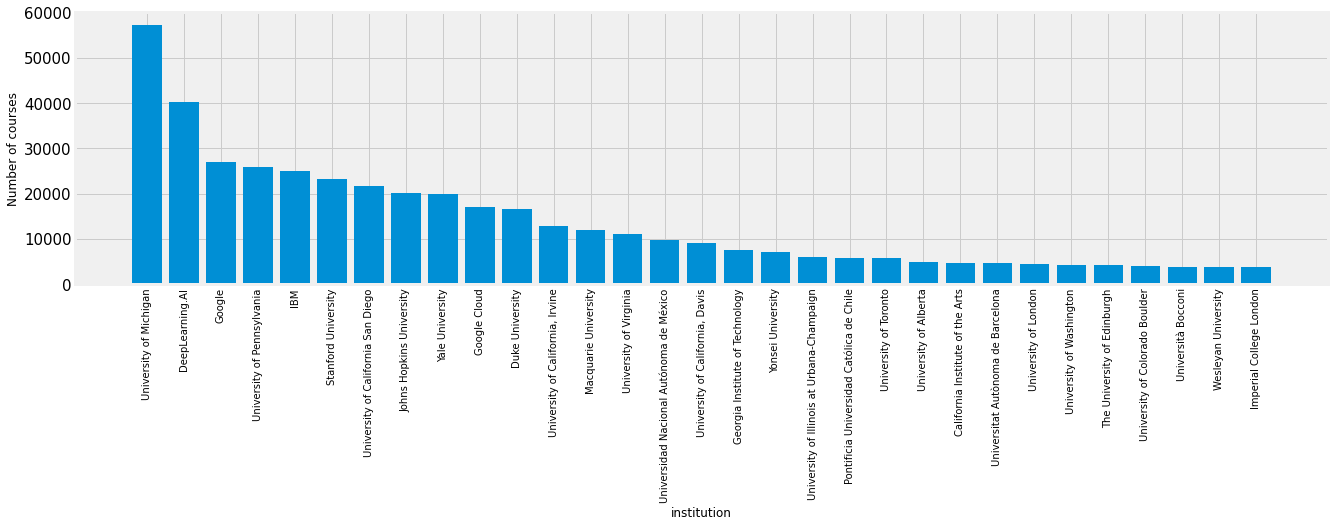

In [27]:
# Using some institution because the size of data is huge  
#we can see that University of Michigan has the hightes number of courses
y = df.institution.value_counts().values[0:31]
x = df.institution.value_counts().index[0:31]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel("institution")
plt.ylabel("Number of courses")
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.show()

In [28]:
#Which course had the highest number of reviews?
top_reviewed_courses = df.name.value_counts()
top_reviewed_courses.head(10)


Programming for Everybody (Getting Started with Python)                           15226
Machine Learning                                                                  12677
Neural Networks and Deep Learning                                                 12292
Technical Support Fundamentals                                                    12055
Learning How to Learn: Powerful mental tools to help you master tough subjects    11871
Python Data Structures                                                            11421
The Science of Well-Being                                                          8199
What is Data Science?                                                              7397
AI For Everyone                                                                    7386
Excel Skills for Business: Essentials                                              7377
Name: name, dtype: int64

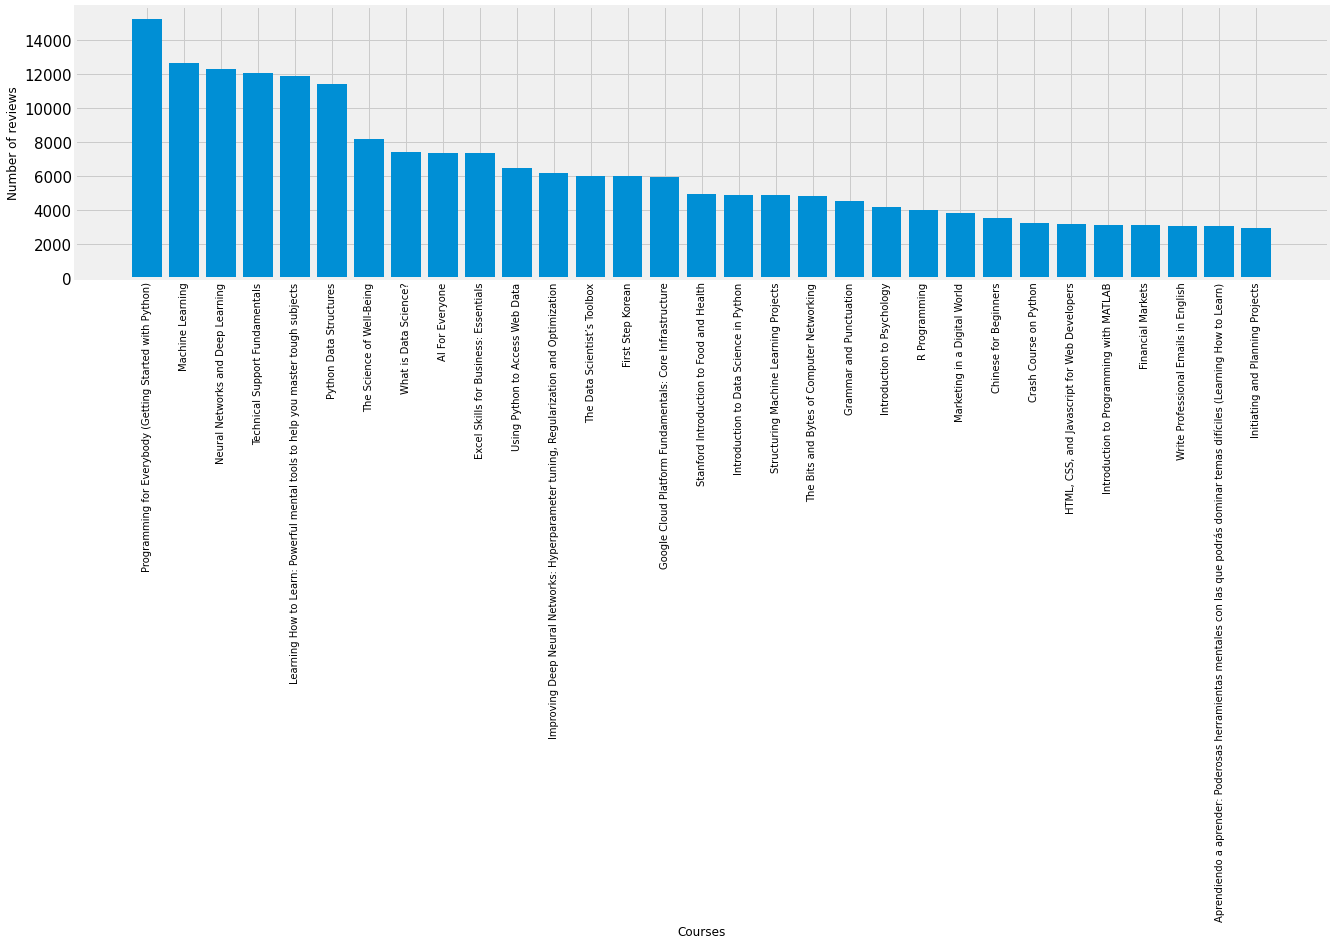

In [29]:
# Using some courses because the size of data is huge  
#we can see that Programming for Everybody course has the hightes number of reviews
y = top_reviewed_courses.values[0:31]
x = top_reviewed_courses.index[0:31]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel("Courses")
plt.ylabel("Number of reviews")
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.show()

In [30]:
#Which institution had the highest rates by reviewers
top_rated_inst=df.groupby(['institution'])['rating'].mean().sort_values(ascending  = False)
top_rated_inst

institution
GitLab                               5.000000
Universidade Estadual de Campinas    4.921109
University of Rochester              4.921053
Arizona State University             4.903518
Universidad de los Andes             4.898058
                                       ...   
Novosibirsk State University         4.077922
Yandex                               3.484127
New York Institute of Finance        3.463768
Saint Petersburg State University    3.387500
University of New Mexico             1.000000
Name: rating, Length: 132, dtype: float64

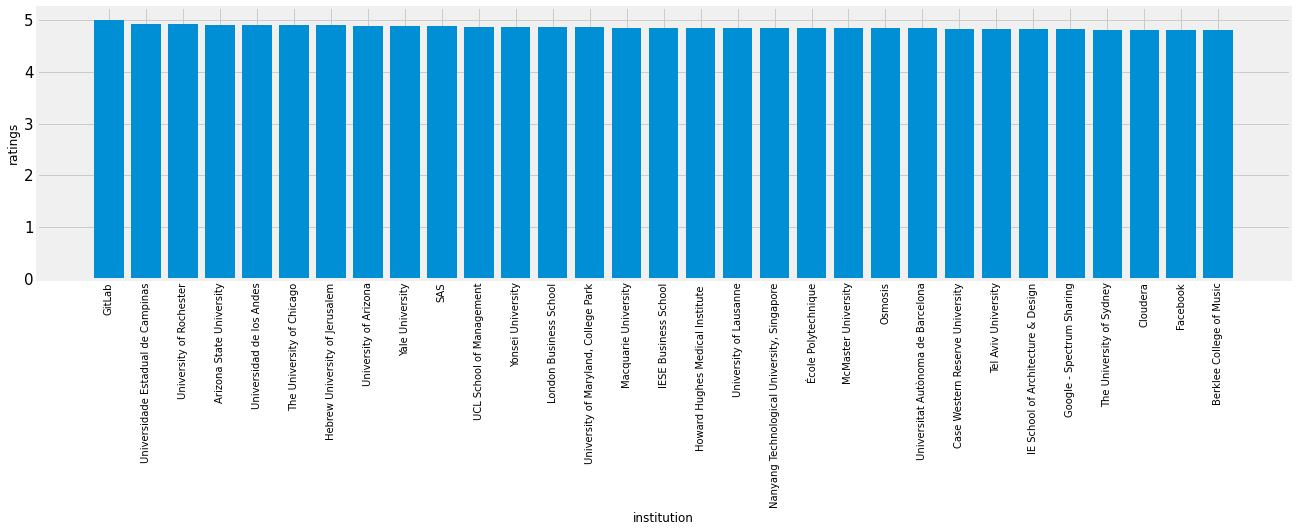

In [31]:
#Which institution had the highest rates by reviewers? GitLab
y = top_rated_inst.values[0:31]
x = top_rated_inst.index[0:31]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel("institution")
plt.ylabel("ratings")
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.show()

In [32]:
#Which institution had the lowest rates by reviewers
low_rated_inst=df.groupby(['institution'])['rating'].mean().sort_values(ascending  = True )
low_rated_inst

institution
University of New Mexico             1.000000
Saint Petersburg State University    3.387500
New York Institute of Finance        3.463768
Yandex                               3.484127
Novosibirsk State University         4.077922
                                       ...   
Universidad de los Andes             4.898058
Arizona State University             4.903518
University of Rochester              4.921053
Universidade Estadual de Campinas    4.921109
GitLab                               5.000000
Name: rating, Length: 132, dtype: float64

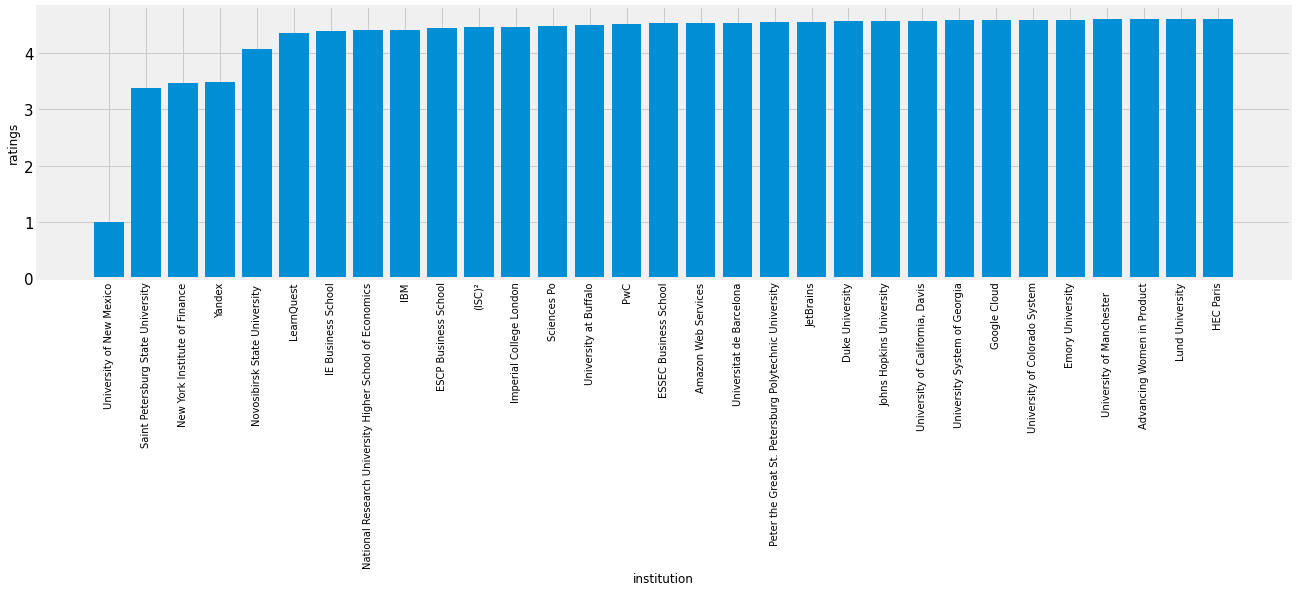

In [33]:
#Which institution had the lowest rates by reviewers? University of New Mexico  
y = low_rated_inst.values[0:31]
x = low_rated_inst.index[0:31]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel("institution")
plt.ylabel("ratings")
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.show()

In [34]:
#Which course had the highest rates by reviewers?
high_rated_courses=df.groupby(['name'])['rating'].mean().sort_values(ascending  = False)

high_rated_courses

name
Entreprise et changement climatique                                         5.000000
How to Manage a Remote Team                                                 5.000000
Building Modern Python Applications on AWS                                  5.000000
Removing Barriers to Change                                                 5.000000
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho    4.968000
                                                                              ...   
The Introduction to Quantum Computing                                       3.204545
Epigenetic Control of Gene Expression                                       1.000000
Entrepreneurship Strategy: From Ideation to Exit                            1.000000
Social and Economic Networks:  Models and Analysis                          1.000000
Curanderismo: Traditional Healing Using Plants                              1.000000
Name: rating, Length: 603, dtype: float64

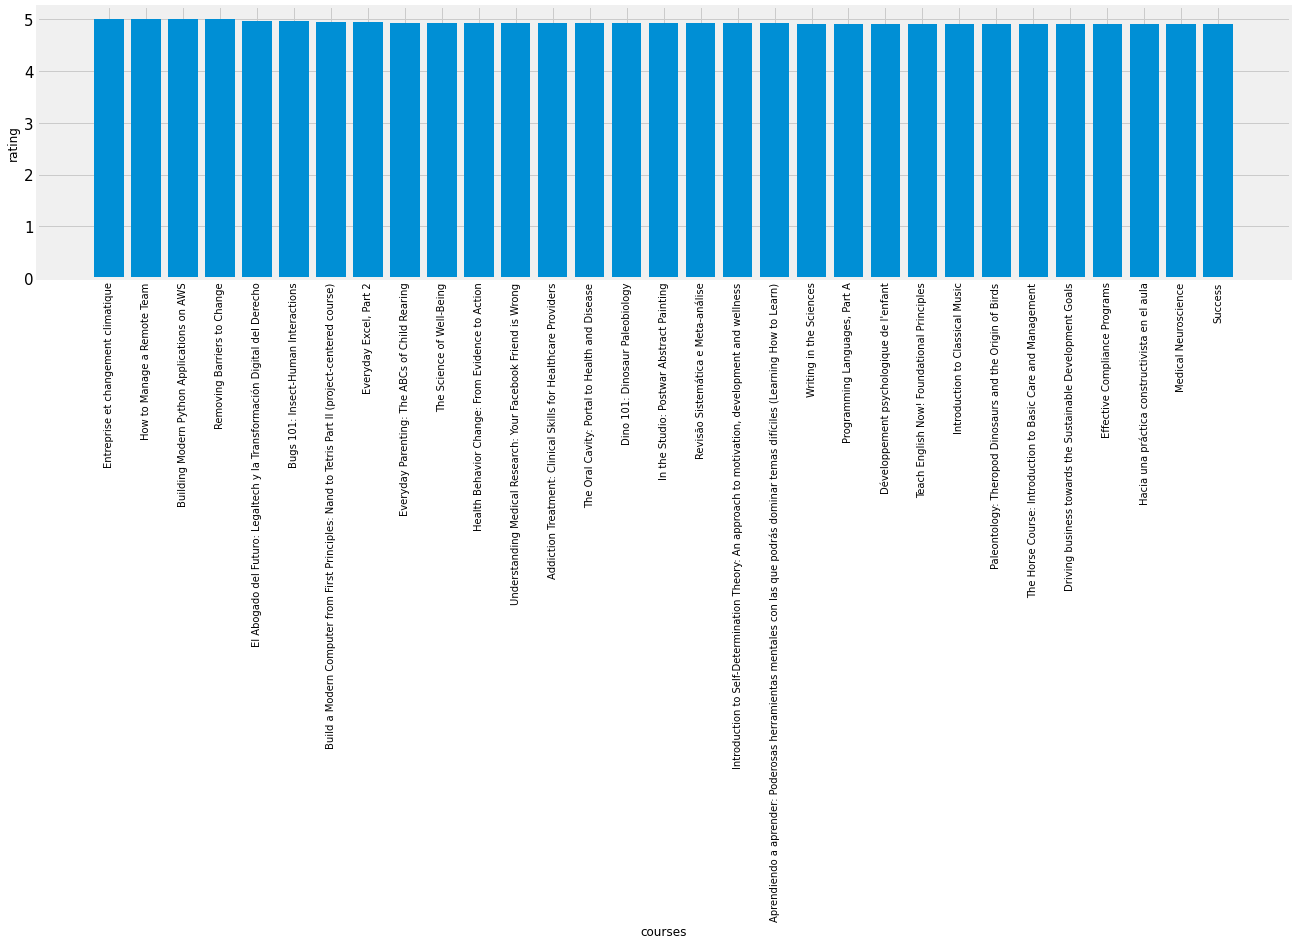

In [35]:
#Which course had the highest rates by reviewers?
y = high_rated_courses.values[0:31]
x = high_rated_courses.index[0:31]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel("courses")
plt.ylabel("rating")
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.show()

In [36]:
#Which course had the lowest rates by reviewers?
low_rated_courses=df.groupby(['name'])['rating'].mean().sort_values(ascending  = True)

low_rated_courses

name
Curanderismo: Traditional Healing Using Plants                              1.000000
Social and Economic Networks:  Models and Analysis                          1.000000
Entrepreneurship Strategy: From Ideation to Exit                            1.000000
Epigenetic Control of Gene Expression                                       1.000000
The Introduction to Quantum Computing                                       3.204545
                                                                              ...   
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho    4.968000
Building Modern Python Applications on AWS                                  5.000000
Entreprise et changement climatique                                         5.000000
Removing Barriers to Change                                                 5.000000
How to Manage a Remote Team                                                 5.000000
Name: rating, Length: 603, dtype: float64

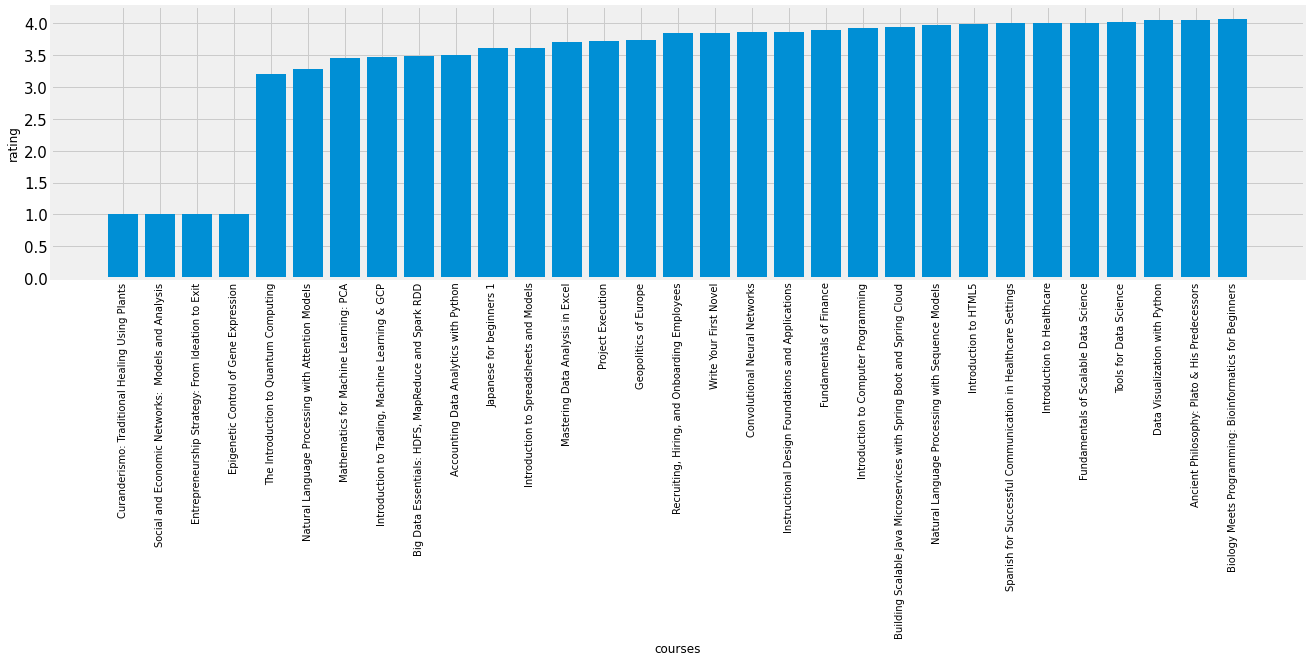

In [37]:
#Which course had the lowest rates by reviewers?
y = low_rated_courses.values[0:31]
x = low_rated_courses.index[0:31]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel("courses")
plt.ylabel("rating")
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.show()

In [38]:
# Since I will predict the rating based on the reviews I will only need sentiment and reviews columns to start with nlp
#preparing the dataset for the text classification problem 
#reviews already been processed and cleaned 
data = df[['sentiment', 'reviews']]
data.head()

,sentiment,reviews
0,1,pretty dry but i was able to pass with just t...
1,1,would be a better experience if the video and ...
2,1,information was perfect the program itself wa...
3,1,a few grammatical mistakes on test made me do ...
4,1,excellent course and the training provided was...


In [39]:
data.shape

(519928, 2)

Start the experiment with imbalanced dataset 


In [40]:
# Split the data into X and y data sets
X = data.reviews[:15000]
y = data.sentiment[:15000]
X.shape


(15000,)

In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(12000,)

In [42]:
#CountVectorizer with max_features=50


cv = CountVectorizer(stop_words='english', max_features=2000 )

X_train_cv = cv.fit_transform(X_train)
X_test_cv  = cv.transform(X_test)
X_train_cv_arr=X_train_cv.toarray()
#X_test_cv_arr=X_test.toarray()
pd.DataFrame(X_train_cv_arr, columns=cv.get_feature_names()).head()

,abilities,ability,able,absolute,absolutely,abstract,academic,access,accessible,accomplished,...,wrote,ya,yale,yeah,year,years,yes,youtube,zero,ótimo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
cv.vocabulary_

{'good': 780,
 'introduction': 965,
 'python': 1448,
 'course': 367,
 'introducing': 964,
 'absolutely': 4,
 'new': 1215,
 'programming': 1419,
 'covers': 377,
 'core': 356,
 'foundations': 733,
 'taught': 1778,
 'approachable': 80,
 'fashion': 674,
 'pleased': 1343,
 'solid': 1647,
 'intro': 960,
 'memory': 1143,
 'programs': 1420,
 'software': 1646,
 'resources': 1519,
 'exceptional': 609,
 'yale': 1992,
 'thanks': 1812,
 'coursera': 369,
 'providing': 1432,
 'platform': 1337,
 'learn': 1019,
 'learned': 1020,
 'man': 1102,
 'special': 1672,
 'respect': 1520,
 'professor': 1406,
 'really': 1478,
 'wonderful': 1969,
 'knowledgeable': 1000,
 'field': 689,
 'given': 769,
 'financial': 699,
 'view': 1924,
 'world': 1979,
 'thank': 1809,
 'shiller': 1601,
 'understand': 1882,
 'instructor': 936,
 'clear': 261,
 'point': 1349,
 'better': 162,
 'oriented': 1265,
 'present': 1377,
 'finally': 696,
 'basic': 137,
 'team': 1786,
 'useful': 1901,
 'informative': 915,
 'starting': 1691,
 'zero':

In [44]:
#  Create a logistic regression model to use 
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
y_pred_cv = lr.predict(X_test_cv)

In [45]:
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_zero', 'predicted_one'], 
                yticklabels=['actual_zero', 'actual_one'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

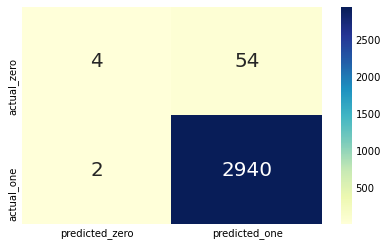

In [46]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv)

Try using TF-IDF instead of Count Vectorizer

In [47]:
# Create TF-IDF versions of the Count Vectorizers created earlier 
tfidf = TfidfVectorizer(stop_words='english',max_features=2000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


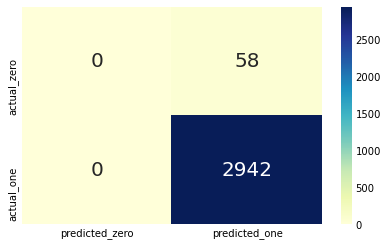

In [48]:
# Fit the logistic regression on the TF-IDF data
lr.fit(X_train_tfidf, y_train)
y_pred_tfidf_lr = lr.predict(X_test_tfidf)
cm2 = conf_matrix(y_test, y_pred_tfidf_lr)

Balanced classes By using SMOTE

In [83]:
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_cv, y_train)

print('Resampled dataset shape training  %s' % Counter(y_res))

X_train_cv.shape

Original dataset shape Counter({'1': 11748, '0': 252})
Resampled dataset shape training  Counter({'1': 11748, '0': 11748})


(12000, 2000)

In [85]:
print('Original dataset shape TF-IDF %s' % Counter(y_train))
sm2 = SMOTE(random_state=42)
X_res_t, y_res_t = sm2.fit_resample(X_train_tfidf, y_train)

print('Resampled dataset shape training TF-IDF %s' % Counter(y_res_t))



Original dataset shape TF-IDF Counter({'1': 11748, '0': 252})
Resampled dataset shape training TF-IDF Counter({'1': 11748, '0': 11748})


In [50]:
#LogisticRegression with balanced classes
lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_res, y_res)
y_pred_cv_smote = lr_smote.predict(X_test_cv)


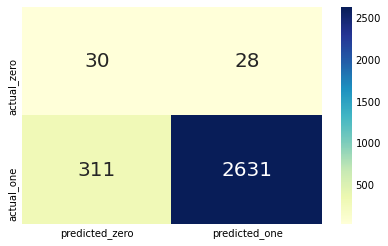

In [51]:
# The heat map for the first logistic regression model
cm3 = conf_matrix(y_test, y_pred_cv_smote)

In [86]:
#LogisticRegression with balanced classes
lr_smote_tf = LogisticRegression(solver='liblinear') 
lr_smote_tf.fit(X_res_t, y_res_t)
y_pred_cv_smote_tf = lr_smote_tf.predict(X_test_tfidf)

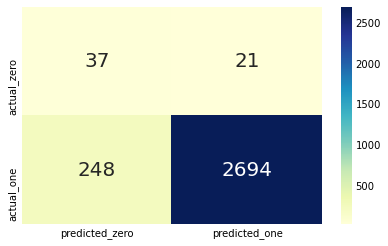

In [90]:
# The heat map for the logistic regression model
cm4 = conf_matrix(y_test, y_pred_cv_smote_tf)

Balanced classes By using ADASYN

In [91]:

ada = ADASYN(random_state=42)
X_res_ada, y_res_ada = ada.fit_resample(X_train_cv, y_train)
print('Resampled dataset shape %s' % Counter(y_res_ada))

Resampled dataset shape Counter({'0': 11771, '1': 11748})


creating number of models with balanced dataset

In [92]:
#LogisticRegression with balanced classes
lr_ada = LogisticRegression(solver='liblinear') 
lr_ada.fit(X_res_ada, y_res_ada)
y_pred_cv_ada = lr_ada.predict(X_test_cv)


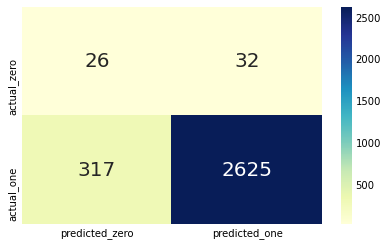

In [93]:
# The heat map for the first logistic regression model
cm5 = conf_matrix(y_test, y_pred_cv_ada)

In [94]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
# fit the training dataset on the classifier
SVM.fit(X_res, y_res)
# predict the labels on validation dataset
SVM_test_preds = SVM.predict(X_test_cv)


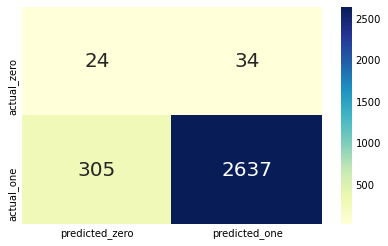

In [95]:
# The heat map for the first logistic regression model
cm6 = conf_matrix(y_test, SVM_test_preds)

In [96]:
#randomforest
rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X_res, y_res)

rf_test_preds = rf.predict(X_test_cv)

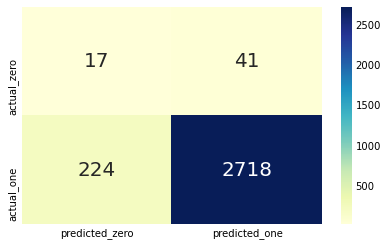

In [97]:
# The heat map for the first logistic regression model
cm7 = conf_matrix(y_test, rf_test_preds)

In [98]:
#NB
nb = MultinomialNB(alpha = .01)
nb.fit(X_res, y_res)
nb_test_preds = nb.predict(X_test_cv)


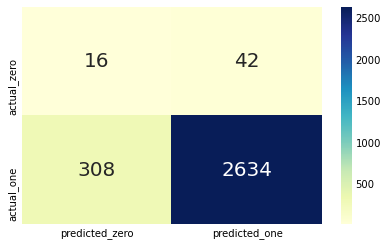

In [99]:
# The heat map for the first logistic regression model
cm8 = conf_matrix(y_test, nb_test_preds)

In [100]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm1,cm2,cm3,cm4,cm5,cm6,cm7,cm8)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['LR_CV','LR1-TFIDF','LR-balanced_ADASYN','LRCV-balanced_class_smote','LRTFIDF-balanced_class_smote'
                      ,'SVM_balanced_smote','RF_balaanced_smote','Bayes_balanced_smote' ]
results_nb

,LR_CV,LR1-TFIDF,LR-balanced_ADASYN,LRCV-balanced_class_smote,LRTFIDF-balanced_class_smote,SVM_balanced_smote,RF_balaanced_smote,Bayes_balanced_smote
Accuracy,0.981,0.981,0.887,0.910,0.884,0.887,0.912,0.883
Precision,0.982,0.981,0.989,0.992,0.988,0.987,0.985,0.984
Recall,0.999,1.000,0.894,0.916,0.892,0.896,0.924,0.895
F1 Score,0.990,0.990,0.939,0.952,0.938,0.939,0.954,0.937
